In [2]:
#Primero empezamos por importar las librerias que usarémos 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Llamamos al archivo y lo decodificamos
df = pd.read_csv('SYB66_246_202310_Population Growth, Fertility and Mortality Indicators.csv', encoding='latin1')
df.head() #Coprobamos que se cargue

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",2010,Population annual rate of increase (percent),1.3,NaN,"United Nations Population Division, New York, ..."
1,1,"Total, all countries or areas",2010,Total fertility rate (children per women),2.6,NaN,"United Nations Population Division, New York, ..."
2,1,"Total, all countries or areas",2010,"Infant mortality for both sexes (per 1,000 liv...",37.1,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2010,"Maternal mortality ratio (deaths per 100,000 p...",254,NaN,"World Health Organization (WHO), the United Na..."
4,1,"Total, all countries or areas",2010,Life expectancy at birth for both sexes (years),70.1,NaN,"United Nations Population Division, New York, ..."


In [6]:
# Cambiamos los años a valor numérico entero
df['Year'] = df['Year'].astype(int)
# Filtrar los datos para el año 2020
df_2020 = df[df["Year"] == 2020]
df_2020 # Comprobamos el cambio y filtro

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
14,1,"Total, all countries or areas",2020,Population annual rate of increase (percent),0.9,NaN,"United Nations Population Division, New York, ..."
15,1,"Total, all countries or areas",2020,Total fertility rate (children per women),2.3,NaN,"United Nations Population Division, New York, ..."
16,1,"Total, all countries or areas",2020,"Infant mortality for both sexes (per 1,000 liv...",28.3,NaN,"United Nations Statistics Division, New York, ..."
17,1,"Total, all countries or areas",2020,"Maternal mortality ratio (deaths per 100,000 p...",223,NaN,"World Health Organization (WHO), the United Na..."
18,1,"Total, all countries or areas",2020,Life expectancy at birth for both sexes (years),72,NaN,"United Nations Population Division, New York, ..."
...,...,...,...,...,...,...,...
6745,722,SIDS,2020,"Infant mortality for both sexes (per 1,000 liv...",29,NaN,"United Nations Statistics Division, New York, ..."
6746,722,SIDS,2020,"Maternal mortality ratio (deaths per 100,000 p...",208,NaN,"World Health Organization (WHO), the United Na..."
6747,722,SIDS,2020,Life expectancy at birth for both sexes (years),72.2,NaN,"United Nations Population Division, New York, ..."
6748,722,SIDS,2020,Life expectancy at birth for males (years),69.3,NaN,"United Nations Population Division, New York, ..."


In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filtro los datos que me pide la gráfica
# Seleccionar únicamente las filas relacionadas con 'Infant mortality' y 'Life expectancy'
df_filtered = df_2020[df_2020['Series'].isin(['Infant mortality for both sexes (per 1,000 live births)', 'Life expectancy at birth for both sexes (years)'])]

# Uso el recurso de Pivotear para tener las series como columnas
df_pivot = df_filtered.pivot_table(index=['Region/Country/Area'], columns='Series', values='Value').reset_index()

# Solo por comodidad cambio el nombre para acortarlo
df_pivot.rename(columns={'Infant mortality for both sexes (per 1,000 live births)': 'Infant Mortality', 'Life expectancy at birth for both sexes (years)': 'Life Expectancy'}, inplace=True)
df_pivot #Pido que me muestre el Df para corroborar los cambios

Series,Region/Country/Area,Infant Mortality,Life Expectancy
0,1,28.3,72.0
1,2,46.4,62.2
2,4,45.8,62.6
3,5,12.7,74.0
4,8,8.8,77.0
...,...,...,...
213,860,12.5,70.3
214,862,15.7,71.1
215,882,14.4,72.8
216,887,45.9,64.7


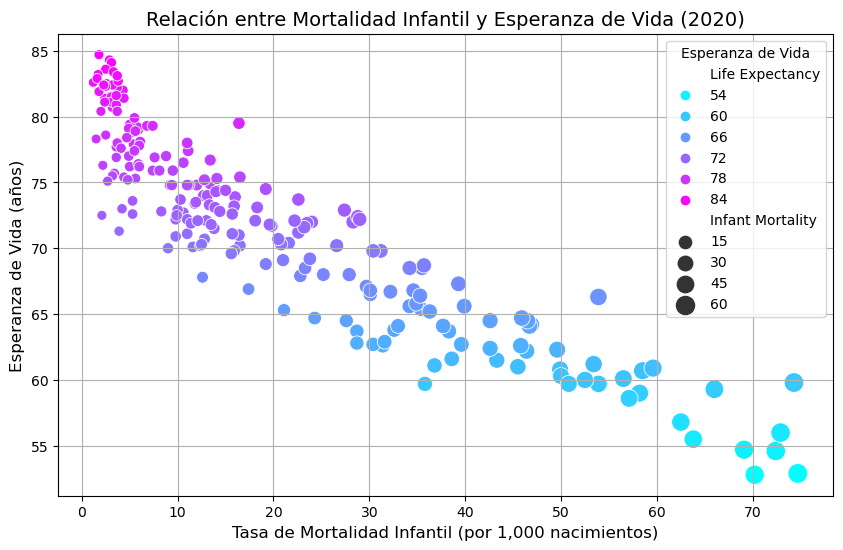

In [12]:
# Genero la gráfica de dispersión usando Seaborn
plt.figure(figsize=(10, 6))
# doy instrucción para crear la grafica con la asignación de ejes, colores y tamaño
sns.scatterplot(data=df_pivot, 
                x='Infant Mortality', 
                y='Life Expectancy', 
                hue='Life Expectancy', 
                palette='cool', 
                size='Infant Mortality', 
                sizes=(50, 200))
# Doy detalle a la grafica (titulos-tamaño)
plt.title('Relación entre Mortalidad Infantil y Esperanza de Vida (2020)', fontsize=14)
plt.xlabel('Tasa de Mortalidad Infantil (por 1,000 nacimientos)', fontsize=12)
plt.ylabel('Esperanza de Vida (años)', fontsize=12)
plt.legend(title='Esperanza de Vida')
plt.grid(True)
plt.show()

## Análisis de la gráfica
#### Se observa en la gráfica una relación inversa entre la taza de mortalidad infantil y la esperanza de vida, los países con tasas de mortalidad infantil más bajas tienden a tener una población que vive más años, mientras que los países con tasas más altas tienen una esperanza de vida significativamente reducida, estos indicadores nos podrían ayudar a invertir en mejorar las condiciones de salud infantil como un factor clave para aumentar la calidad de vida; para explicar los puntos más hacia la izquierda (baja mortalidad infantil) tienden a ser de colores más cálidos (rosa y fucsia), indicando una mayor esperanza de vida. Por el contrario, los puntos hacia la derecha (alta mortalidad infantil) son predominantemente azules; por otro lado, el tamaño de los puntos representa diferentes niveles de mortalidad infantil (15, 30, 45 y 60). Los puntos más grandes se encuentran hacia la derecha, En la parte superior izquierda de la gráfica (baja mortalidad infantil y alta esperanza de vida), se encuentran países con sistemas de salud avanzados y mejores condiciones de vida; En la parte inferior derecha (alta mortalidad infantil y baja esperanza de vida), se encuentran países con mayores desafíos en términos de salud pública y desarroll.
#### También observamos que la Mortalidad Infantil varía desde aproximadamente 15 hasta 60 muertes por cada 1,000 nacimientos, mientras que la Esperanza de Vida oscila entre 54 y 84 años.

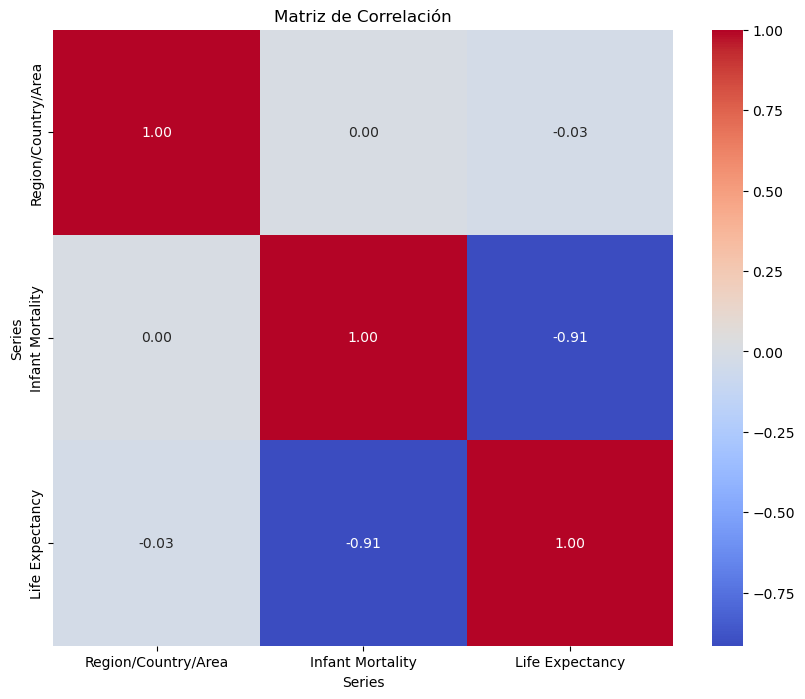

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt
# A partir del Df anterior genero la matriz
correlation_matrix = df_pivot.corr()
# Doy la instrucción para crear un mapa de calor de la matriz de correlación y después la vinculo
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación') # Agrego el titulo
plt.show() #Pido que se muestre

## Análisis de la grafica
### Nomenclatura del mapa de calor:
#### Rojo intenso indica correlaciones positivas fuertes (cercanas a 1)
#### Azul intenso indica correlaciones negativas fuertes (cercanas a -1)
#### Gris claro indica correlaciones cercanas a 0
#
### En resumen la matriz de correlación muestra que la Mortalidad Infantil y la Esperanza de Vida tienen una fuerte correlación negativa, mientras que la Región/País y Área tiene una correlación muy débil o nula con las otras variables, esto nos indica que la mortalidad infantil es un factor clave que influye en la esperanza de vida, independientemente de la ubicación geográfica